Matplotlib 是 Python 中最常用的可视化工具之一，可以非常方便地创建海量类型地 2D 图表和一些基本的 3D 图表。Matplotlib 最早是为了可视化癫痫病人的脑皮层电图相关的信号而研发，因为在函数的设计上参考了 MATLAB，所以叫做 Matplotlib。Matplotlib 首次发表于 2007 年，在开源和社区的推动下，现在在基于 Python 的各个科学计算领域都得到了广泛应用。Matplotlib 的原作者 John D. Hunter 博士是一名神经生物学家，2012年不幸因癌症去世，感谢他创建了这样一个伟大的库。

# 2D 图表
Matplotlib 中最基础的模块是 `pyplot`。先从最简单的点图和线图开始，比如我们有一组数据，还有一个拟合模型，通过下面的代码图来可视化：

Populating the interactive namespace from numpy and matplotlib


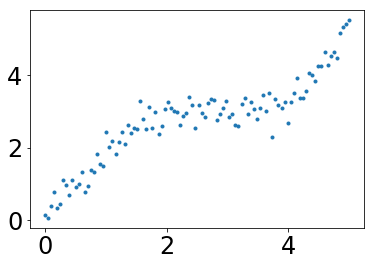

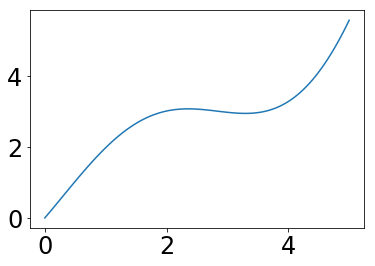

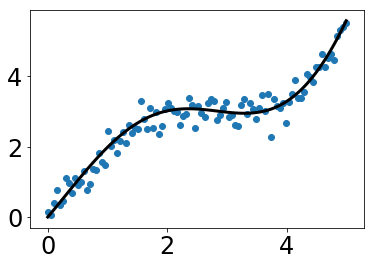

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

%pylab inline
# 通过 rcParams 设置全局横纵轴字体大小
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24

np.random.seed(42)

# x轴的采样点
x = np.linspace(0, 5, 100)

# 通过下面曲线加上噪声生成数据，所以拟合模型就用y了
y = 2 * np.sin(x) + 0.3 * x ** 2
y_data = y + np.random.normal(scale=0.3, size=100)

# figure()指定图表名称
plt.figure('data')

# '.'标明画散点图，每个散点的形状是个圆
plt.plot(x, y_data, '.')

# 画模型的图，plot函数默认画连线图
plt.figure('model')
plt.plot(x, y)

# 两个图画一起
plt.figure('data & model')

# 通过'k'指定线的颜色，lw指定线的宽度
# 第三个参数除了颜色也可以指定线形，比如'r--'表示红色虚线
# 更多属性可以参考官网：http://matplotlib.org/api/pyplot_api.html
plt.plot(x, y, 'k', lw=3)

# scatter可以更容易地生成散点图
plt.scatter(x, y_data)

# 将当前figure的图保存到文件result.png
plt.savefig('result.png')

# 一定要加上这句才能让画好的图显示在屏幕上
plt.show()

基本的画图方法就是这么简单，如果想了解更多pyplot的属性和方法来画出风格多样的图像，可以参考官网：
- [pyplot - Matplotlib 1.5.3 documentation](https://matplotlib.org/api/pyplot_api.html)
- [Customizing matplotlib](https://matplotlib.org/users/customizing.html)

点和线图表只是最基本的用法，有的时候我们获取了分组数据要做对比，柱状或饼状类型的图或许更合适：

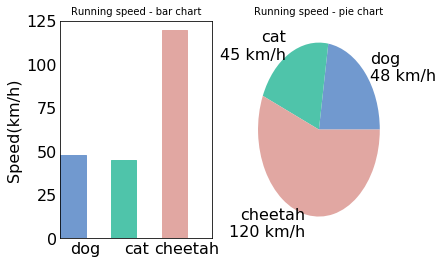

In [22]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['ytick.major.size'] = 0

# 包含了狗，猫和猎豹的最高奔跑速度，还有对应的可视化颜色
speed_map = {
    'dog': (48, '#7199cf'),
    'cat': (45, '#4fc4aa'),
    'cheetah': (120, '#e1a7a2')
}

# 整体图的标题
fig = plt.figure('Bar chart & Pie chart')

# 在整张图上加入一个子图，121的意思是在一个1行2列的子图中的第一张
ax = fig.add_subplot(121)
ax.set_title('Running speed - bar chart')

# 生成x轴每个元素的位置
xticks = np.arange(3)

# 定义柱状图每个柱的宽度
bar_width = 0.5

# 动物名称
animals = speed_map.keys()

# 奔跑速度
speeds = [x[0] for x in speed_map.values()]

# 对应颜色
colors = [x[1] for x in speed_map.values()]

# 画柱状图，横轴是动物标签的位置，纵轴是速度，定义柱的宽度，同时设置柱的边缘为透明
bars = ax.bar(xticks, speeds, width=bar_width, edgecolor='none')

# 设置y轴的标题
ax.set_ylabel('Speed(km/h)')

# x轴每个标签的具体位置，设置为每个柱的中央
ax.set_xticks(xticks+bar_width/2)

# 设置每个标签的名字
ax.set_xticklabels(animals)

# 设置x轴的范围
ax.set_xlim([bar_width/2-0.5, 3-bar_width/2])

# 设置y轴的范围
ax.set_ylim([0, 125])

# 给每个bar分配指定的颜色
for bar, color in zip(bars, colors):
    bar.set_color(color)

# 在122位置加入新的图
ax = fig.add_subplot(122)
ax.set_title('Running speed - pie chart')

# 生成同时包含名称和速度的标签
labels = ['{}\n{} km/h'.format(animal, speed) for animal, speed in zip(animals, speeds)]

# 画饼状图，并指定标签和对应颜色
ax.pie(speeds, labels=labels, colors=colors)

plt.show()

在这段代码中又出现了一个新的东西叫做，一个用 `ax` 命名的对象。在 Matplotlib 中，画图时有两个常用概念，一个是平时画图蹦出的一个窗口，这叫一个 `figure`。Figure相当于一个大的画布，在每个 figure 中，又可以存在多个子图，这种子图叫做 `axes`。顾名思义，有了横纵轴就是一幅简单的图表。在上面代码中，先把 `figure` 定义成了一个一行两列的大画布，然后通过 `fig.add_subplot()` 加入两个新的子图。`subplot` 的定义格式很有趣，数字的前两位分别定义行数和列数，最后一位定义新加入子图的所处顺序，当然想写明确些也没问题，用逗号分开即可。

# 3D图表
Matplotlib 中也能支持一些基础的 3D 图表，比如曲面图，散点图和柱状图。这些 3D 图表需要使用 mpl_toolkits 模块，先来看一个简单的曲面图的例子：

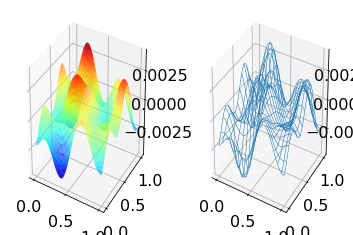

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# 3D图标必须的模块，project='3d'的定义
from mpl_toolkits.mplot3d import Axes3D     

np.random.seed(42)

n_grids = 51        	# x-y平面的格点数 
c = int(n_grids / 2)     	# 中心位置
nf = 2              	# 低频成分的个数

# 生成格点
x = np.linspace(0, 1, n_grids)
y = np.linspace(0, 1, n_grids)

# x 和 y 是长度为 n_grids 的 array
# meshgrid 会把 x 和 y 组合成 n_grids*n_grids 的 array，X 和 Y 对应位置就是所有格点的坐标
X, Y = np.meshgrid(x, y)

# 生成一个0值的傅里叶谱
spectrum = np.zeros((n_grids, n_grids), dtype=np.complex)

# 生成一段噪音，长度是 int((2*nf+1)**2/2)
noise = [np.complex(x, y) for x, y in np.random.uniform(-1,1,(int((2*nf+1)**2/2), 2))]

# 傅里叶频谱的每一项和其共轭关于中心对称
noisy_block = np.concatenate((noise, [0j], np.conjugate(noise[::-1])))

# 将生成的频谱作为低频成分
spectrum[c-nf:c+nf+1, c-nf:c+nf+1] = noisy_block.reshape((2*nf+1, 2*nf+1))

# 进行反傅里叶变换
Z = np.real(np.fft.ifft2(np.fft.ifftshift(spectrum)))

# 创建图表
fig = plt.figure('3D surface & wire')

# 第一个子图，surface图
ax = fig.add_subplot(1, 2, 1, projection='3d')

# alpha定义透明度，cmap是color map
# rstride和cstride是两个方向上的采样，越小越精细，lw是线宽
ax.plot_surface(X, Y, Z, alpha=0.7, cmap='jet', rstride=1, cstride=1, lw=0)

# 第二个子图，网线图
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_wireframe(X, Y, Z, rstride=3, cstride=3, lw=0.5)

plt.show()

这个例子中先生成一个所有值均为 $0$ 的复数 array 作为初始频谱，然后把频谱中央部分用随机生成，但同时共轭关于中心对称的子矩阵进行填充。这相当于只有低频成分的一个随机频谱。最后进行反傅里叶变换就得到一个随机波动的曲面，

3D 的散点图也是常常用来查看空间样本分布的一种手段，并且画起来比表面图和网线图更加简单，来看例子：

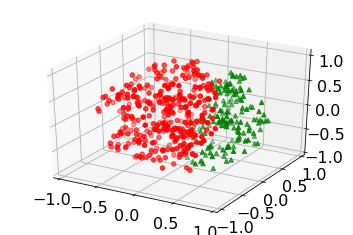

In [55]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D

np.random.seed(42)

# 采样个数500
n_samples = 500
dim = 3

# 先生成一组3维正态分布数据，数据方向完全随机
samples = np.random.multivariate_normal(
    np.zeros(dim),
    np.eye(dim),
    n_samples
)

# 通过把每个样本到原点距离和均匀分布吻合得到球体内均匀分布的样本
for i in range(samples.shape[0]):
    r = np.power(np.random.random(), 1.0/3.0)
    samples[i] *= r / np.linalg.norm(samples[i])

upper_samples = []
lower_samples = []

for x, y, z in samples:
    # 3x+2y-z=1作为判别平面
    if z > 3*x + 2*y - 1:
        upper_samples.append((x, y, z))
    else:
        lower_samples.append((x, y, z))

fig = plt.figure('3D scatter plot')
ax = fig.add_subplot(111, projection='3d')

uppers = np.array(upper_samples)
lowers = np.array(lower_samples)

# 用不同颜色不同形状的图标表示平面上下的样本
# 判别平面上半部分为红色圆点，下半部分为绿色三角
ax.scatter(uppers[:, 0], uppers[:, 1], uppers[:, 2], c='r', marker='o')
ax.scatter(lowers[:, 0], lowers[:, 1], lowers[:, 2], c='g', marker='^')

plt.show()

这个例子中，为了方便，直接先采样了一堆3维的正态分布样本，保证方向上的均匀性。然后归一化，让每个样本到原点的距离为 $1$，相当于得到了一个均匀分布在球面上的样本。再接着把每个样本都乘上一个均匀分布随机数的开 $3$ 次方，这样就得到了在球体内均匀分布的样本，最后根据判别平面  $3x+2y-z-1=0$ 对平面两侧样本用不同的形状和颜色画出，

# 图像显示
Matplotlib 也支持图像的存取和显示，并且和 OpenCV 一类的接口比起来，对于一般的二维矩阵的可视化要方便很多，来看例子

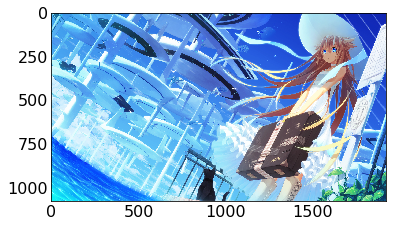

In [58]:
import matplotlib.pyplot as plt

# 读取一张本地的照片并显示
plt.figure('A Little')
little_img = plt.imread('E:/Images/5a2e2075f331d.png')
plt.imshow(little_img)

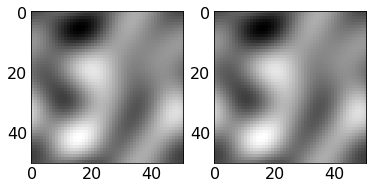

In [65]:
# Z 是上小节生成的随机图案，img0 就是 Z，img1 是 Z 做了个简单的变换
img0 = Z
img1 = 3 * Z + 4

# cmap指定为 'gray' 用来显示灰度图
fig = plt.figure('Auto Normalized Visualization')
ax0 = fig.add_subplot(121)
ax0.imshow(img0, cmap='gray')

ax1 = fig.add_subplot(122)
ax1.imshow(img1, cmap='gray')

plt.show()

这段代码中第一个例子是读取一个本地图片并显示，第二个例子中直接把上小节中反傅里叶变换生成的矩阵作为图像拿过来，原图和经过乘以 $3$ 再加 $4$ 变换的图直接绘制了两个形状一样，但是值的范围不一样的图案。显示的时候 `imshow` 会自动进行归一化，把最亮的值显示为纯白，最暗的值显示为纯黑。这是一种非常方便的设定，尤其是查看深度学习中某个卷积层的响应图时。